<a href="https://colab.research.google.com/github/Da23849156/PING-HAN-TSAI/blob/master/AIhomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**資料檢視**

**新增validation set**

In [0]:
x_valid=x_train[:6000]/255

In [0]:
y_valid=y_train[:6000]

In [0]:
x_train_new=x_train[6000:]/255

In [0]:
y_train_new=y_train[6000:]

**建立model**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import Adam

In [0]:
model = Sequential()

**新增Flatten layer，讓輸入的影像成為1D 28X28矩陣**

In [0]:
model.add(Flatten(input_shape=[28,28]))

**改變模型的層數跟神經元數**

In [0]:
model.add(Dense(350,activation="relu"))


In [0]:
model.add(Dense(120,activation='relu'))

In [0]:
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 350)               274750    
_________________________________________________________________
dense_15 (Dense)             (None, 120)               42120     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1210      
Total params: 318,080
Trainable params: 318,080
Non-trainable params: 0
_________________________________________________________________


**改變loss從mse變成sparse_categorical_crossentropy:**
loss不採取mse而使用sparese_categorical_crossentropy。此常用於類別相關辨識。不用categorical_crossentropy主要是因為要辨識的物件不是one-hot encoded。

**改變optimizer從SGD變成adam:**
adam為目前常使用的optimizer之一，能使學習率有個固定範圍，讓參數更新較平穩

**改變learning rate:**

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

**改變batch size跟epochs且增加validation data檢驗**

In [0]:
response=model.fit(x_train_new,y_train_new,batch_size=150,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2347 - accuracy: 0.9108 - val_loss: 0.2864 - val_accuracy: 0.8947
Epoch 2/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2223 - accuracy: 0.9158 - val_loss: 0.2784 - val_accuracy: 0.8970
Epoch 3/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2156 - accuracy: 0.9194 - val_loss: 0.2905 - val_accuracy: 0.8968
Epoch 4/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2112 - accuracy: 0.9197 - val_loss: 0.2868 - val_accuracy: 0.8938
Epoch 5/30
360/360 [==============================] - 1s 3ms/step - loss: 0.2048 - accuracy: 0.9224 - val_loss: 0.2908 - val_accuracy: 0.8927
Epoch 6/30
360/360 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9254 - val_loss: 0.3010 - val_accuracy: 0.8990
Epoch 7/30
360/360 [==============================] - 1s 3ms/step - loss: 0.1920 - accuracy: 0.9271 - val_loss: 0.2966 - val_accuracy: 0.8963
Epoch 

In [0]:
import pandas as pd

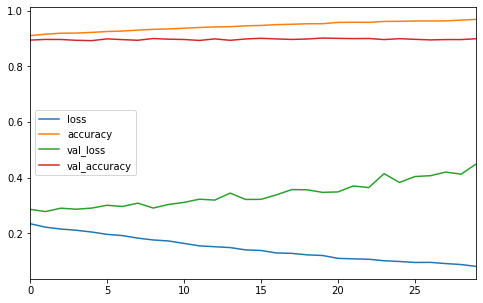

In [0]:
pd.DataFrame(response.history).plot(figsize=(8,5))

In [0]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 112.5753 - accuracy: 0.8688


[112.57525634765625, 0.8687999844551086]

In [0]:
result=model.predict_classes(x_test)
result

array([9, 2, 1, ..., 8, 1, 5])

In [0]:
n=100
print('神經網路預測是：',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')